In [1]:
## IGNORE ##
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

## IGNORE ##
import os
os.chdir('/content/drive/MyDrive/AML')

Mounted at /content/drive


In [2]:
!pwd

/content/drive/MyDrive/AML


In [3]:
import cv2
import os
import numpy as np
from PIL import Image
from PIL import ImageFilter
from sklearn.decomposition import PCA
from scipy.spatial import procrustes

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import matplotlib.pyplot as plt
from skimage import io,color,transform
import pandas as pd

In [5]:
# Load the rocks images into an array
rocks = []

filenames = sorted(os.listdir("360 Rocks"))

for filename in filenames:
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        path = os.path.join('360 Rocks', filename)
        img = Image.open(path)
        gray_im = img.convert("L")
        rocks.append(gray_im)

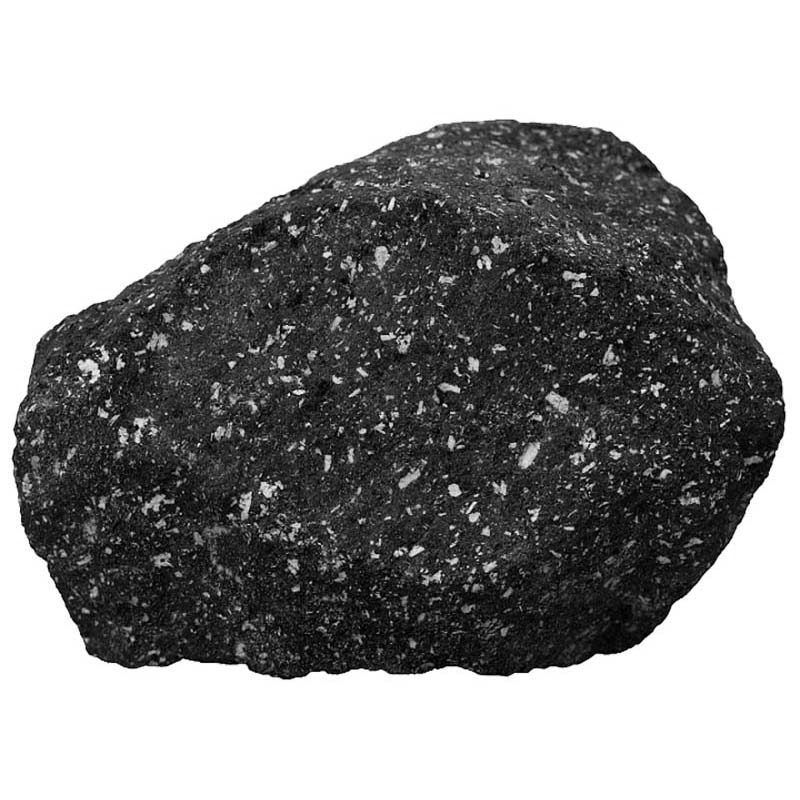

In [6]:
rocks[0]

In [7]:
type(rocks[0])

PIL.Image.Image

In [8]:
type(rocks)

list

In [9]:
len(rocks)

360

In [10]:
rocks[0].size

(800, 800)

In [11]:
rock_arr = np.array(rocks)

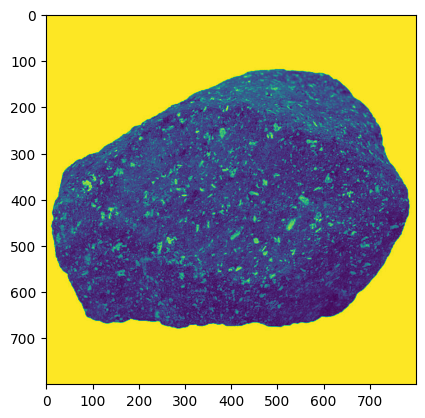

In [12]:
plt.imshow(rocks[0])

In [13]:
rock_arr.shape

(360, 800, 800)

In [14]:
rock_arr

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       ...,

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255

In [15]:
img_count, height, width = rock_arr.shape

In [16]:
flattened_images = rock_arr.reshape(rock_arr.shape[0], -1)


In [17]:
flattened_images

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

# 1. Apply PCA to the images from folder '360 Rocks'. How many components do you need to preserve 90% of the variance? [3 points]

In [18]:
# Extracting image categories from the filename
img_categories = []

for filename in filenames:
  img_categories.append(filename[0])

In [19]:
print(img_categories)

['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',

In [20]:
cat_nums = []
for i in img_categories:
  if i == 'I':
    cat_nums.append(0)
  elif i == 'M':
    cat_nums.append(1)
  elif i == 'S':
    cat_nums.append(2)

In [21]:
print(cat_nums)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

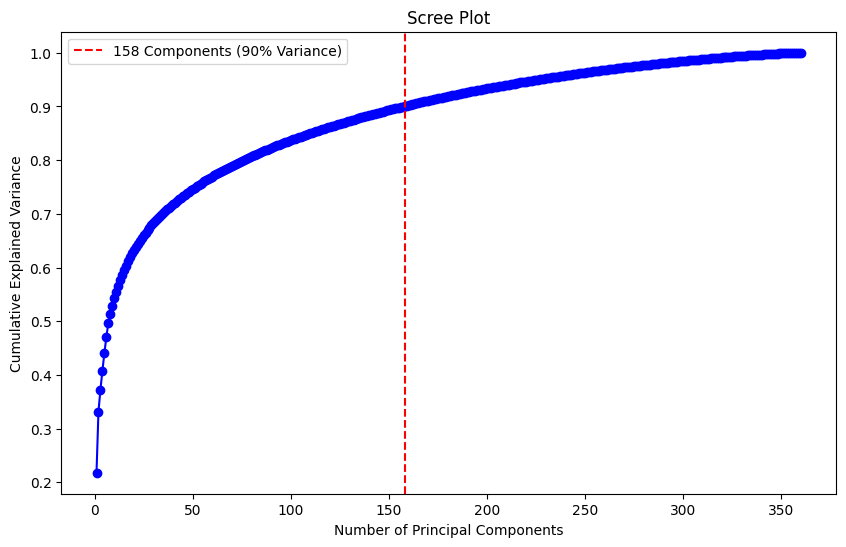

In [22]:
pca = PCA()
pca.fit(flattened_images)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components to preserve 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(x=n_components_90, color='r', linestyle='--', label=f'{n_components_90} Components (90% Variance)')
plt.legend()
plt.show()


In [23]:
print("\n\n")
print(f"Number of components to preserve 90% variance: {n_components_90}")




Number of components to preserve 90% variance: 158


## 2. Plot 10 images of your choice in the original form (without PCA) and then plot their reconstruction (projection in the original space) after you kept 90% of variance using PCA. [3 points]

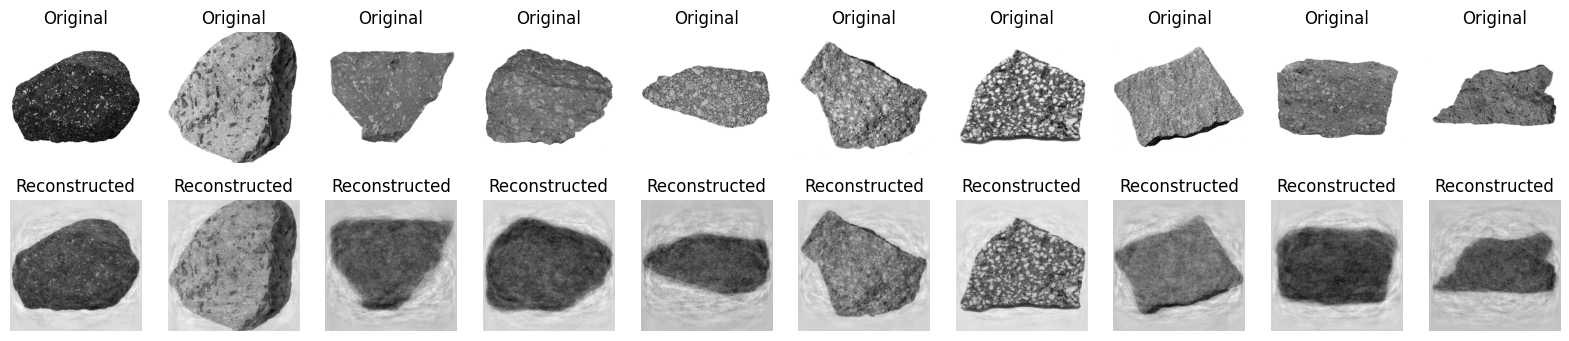

In [24]:
pca = PCA(n_components=158)
images_pca = pca.fit_transform(flattened_images)

# Reconstruct the images from the PCA components
images_reconstructed = pca.inverse_transform(images_pca)
images_reconstructed = images_reconstructed.reshape(img_count, height, width)

# Display 10 original and reconstructed images
num_displayed = 10
fig, axes = plt.subplots(2, num_displayed, figsize=(2 * num_displayed, 4))

for i in range(num_displayed):
    axes[0, i].imshow(rocks[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    axes[1, i].imshow(images_reconstructed[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Reconstructed')

plt.show()

## 3. Each of the images belongs to one of three rock categories. The category is indicated by the first letter in the filename (I, M and S). We will now try to see if the visualization can help us identify different clusters.

### A. Use PCA to reduce dimensionality to only 2 dimensions. How much of the variance is explained with the first two principal components? [2 points].

In [25]:
pca = PCA(2)
X2D = pca.fit_transform(flattened_images)

In [26]:
cumulative_variance_2 = np.sum(pca.explained_variance_ratio_)
print(f"Variance explained by the first two principal components: {cumulative_variance_2 * 100:.2f}%")

Variance explained by the first two principal components: 33.19%


### B. Plot a 2D scatter plot of the images spanned by the first two principal components. Each image will be represented with a dot. Make the color of the dot correspond to the image category (so you will have three different colors). Then add some rock images to the visualization to better understand what features in the images are accounting for the majority of variance in the data (your visualization should look similar to the one after line 71 in this file https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynbLinks to an external site. but with images of rocks instead of MNIST digits). Repeat the process and create the same type of plots for t-SNE, LLE and MDS. [6 points]

In [27]:
flattened_images.shape

(360, 640000)

In [28]:
# Reference : https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import pandas as pd

def plot_rocks(X, y, min_distance=0.08, images=None, figsize=(13, 10)):
    # Scaling the principal components so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
   #print(X_normalized)

    neighbors = np.array([[10., 10.]])

    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    rocks = np.unique(img_categories)

    df = pd.DataFrame(X_normalized, columns=['PC1', 'PC2'])
    df['Category'] = img_categories
    colors = {'I': 'red', 'M': 'green', 'S': 'blue'}
    for category, colour in colors.items():
      subset = df[df['Category'] == category]
      plt.scatter(subset['PC1'], subset['PC2'], c=colour, label=category, alpha=0.5)
    #plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
      closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
      if closest_distance > min_distance:
          neighbors = np.r_[neighbors, [image_coord]]
          if images is None:
              plt.text(image_coord[0], image_coord[1], str((img_categories[index])),
                        fontdict={"weight": "bold", "size": 16})
          else:
              image = images[index].reshape(800, 800)
              pil_image = Image.fromarray(image)
              resized_image = pil_image.resize((28, 28))
              imagebox = AnnotationBbox(OffsetImage(resized_image, cmap="binary"),image_coord)
              ax.add_artist(imagebox)
    # Add labels and title
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.title('Scatter Plot with Categories')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()


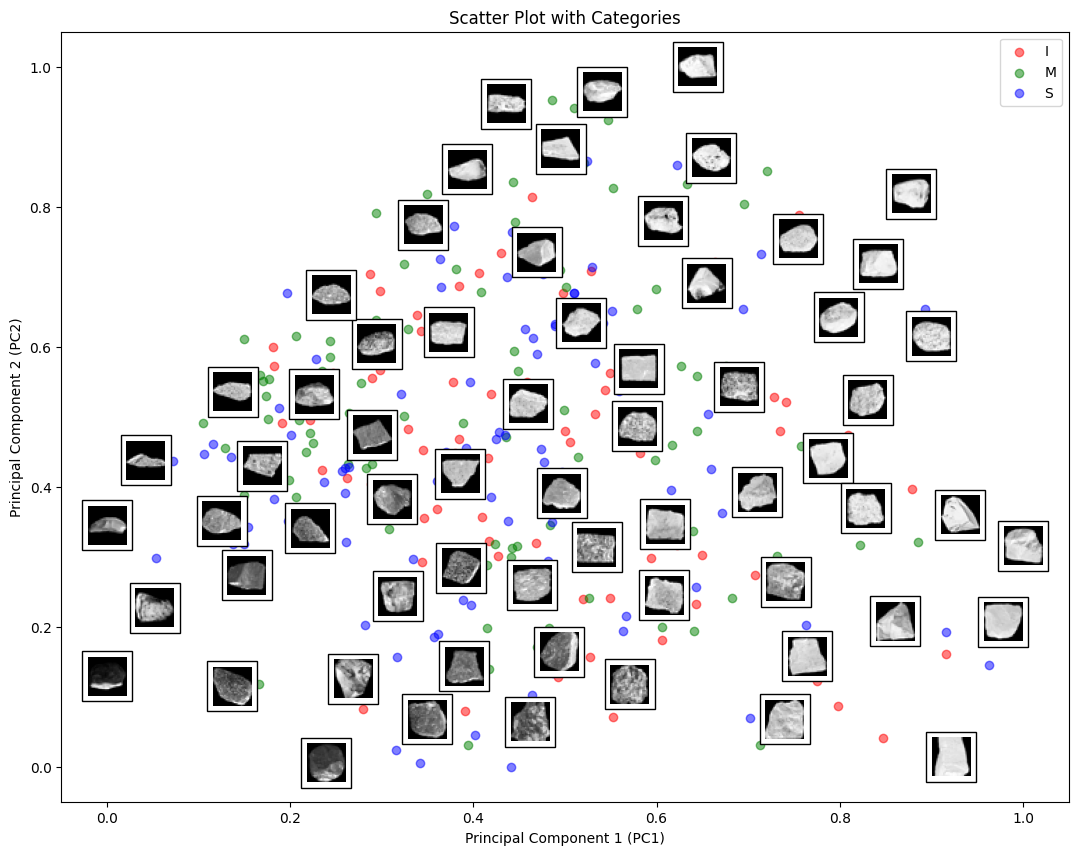

In [29]:
plot_rocks(X2D, img_categories,images=flattened_images)

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto", random_state=42)

X_tsne = tsne.fit_transform(flattened_images)

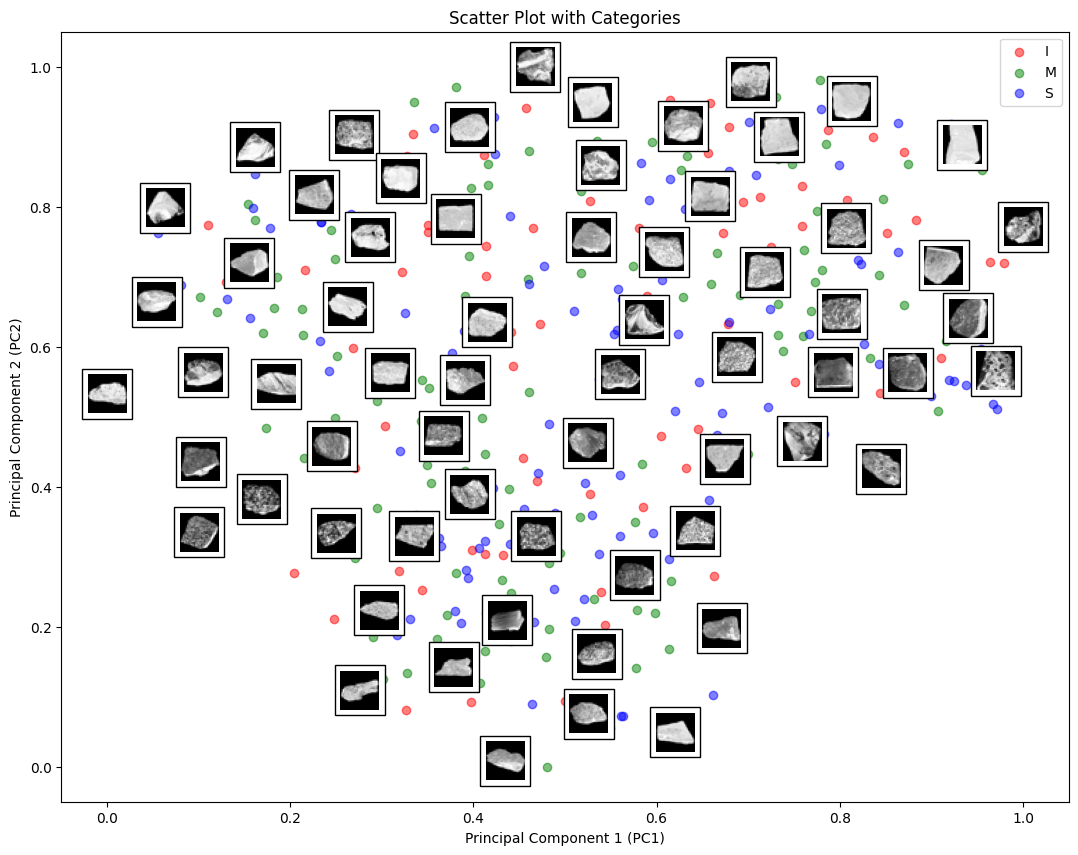

In [31]:
plot_rocks(X_tsne, img_categories,images=flattened_images)

In [32]:
from sklearn.manifold import MDS

X_mds = MDS(n_components = 2, normalized_stress=False, random_state=42).fit_transform(flattened_images)

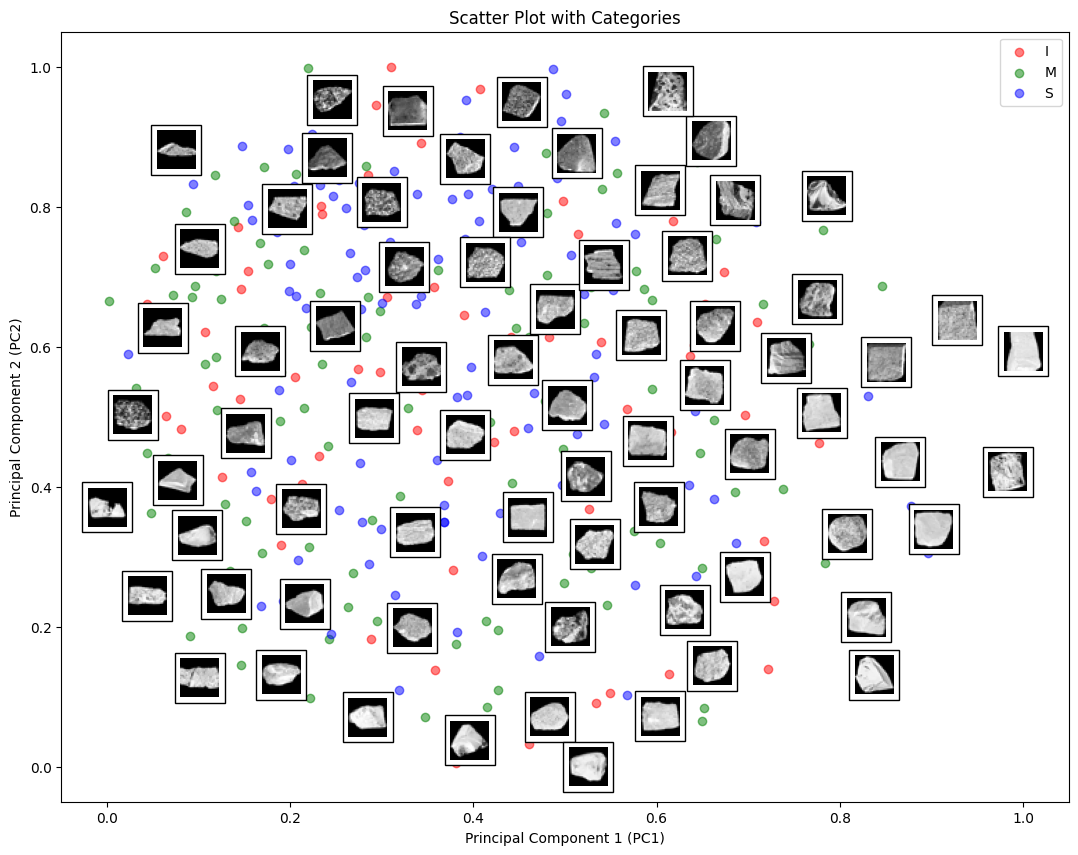

In [33]:
plot_rocks(X_mds, img_categories,images=flattened_images)

In [34]:
from sklearn.manifold import LocallyLinearEmbedding

X_lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42).fit_transform(flattened_images)

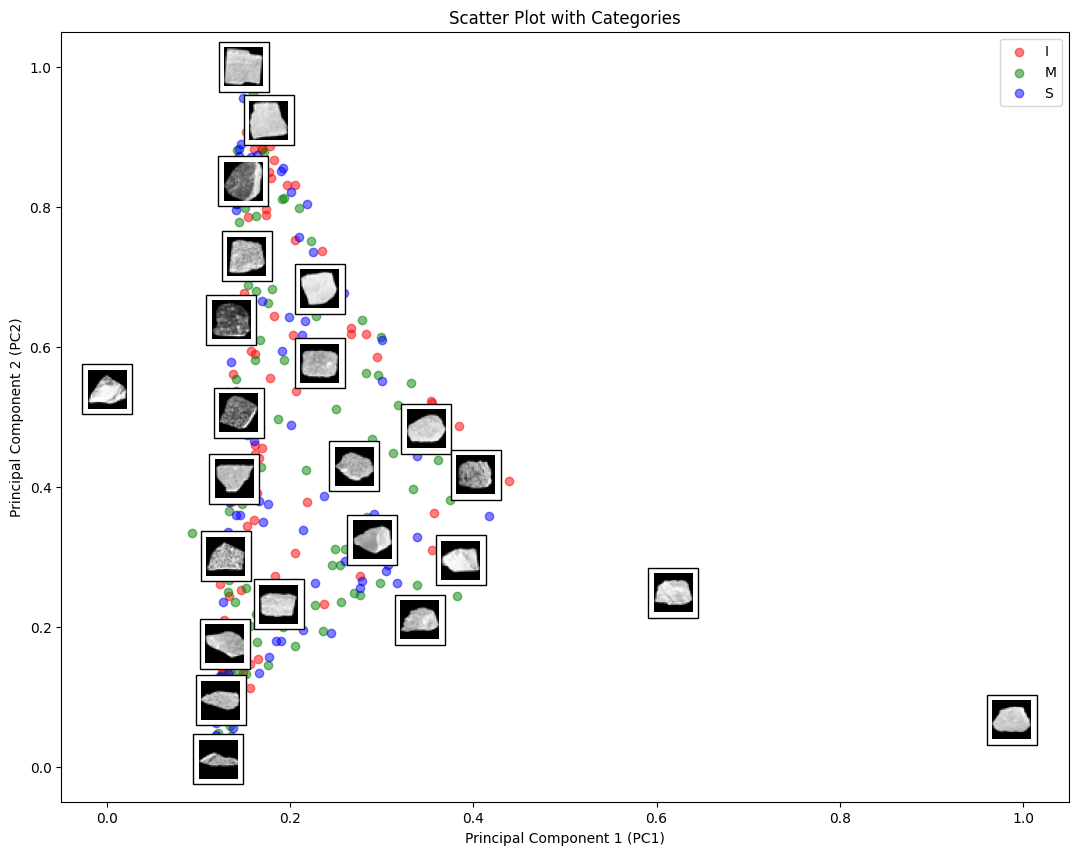

In [35]:
plot_rocks(X_lle, img_categories,images=flattened_images)

#### Discussion:
- Using only 2 components doesn't help us classify the rocks.
- In the scatterplots, there are no clear clusters/groups within just the first two components.
- There are some outliers from the cluster while using LLE.

##4. Now let's see if these dimensionality reduction techniques can give us similar features to those that humans use to judge the images. File mds_360.txt contains 8 features for each of the images (rankings are in the same order as the images in  '360 Rocks' folder. Run PCA, t-SNE, LLE and MDS to reduce the dimensionality of the images to 8. Then, compare those image embeddings with the ones from humans that are in the mds_360.txt file. Use Procrustes analysis to do the comparison (here is one example of how to do that mtx1, mtx2, disparity = procrustes(matrix_with_human_data, matrix_with_pca_embeddings_data). Here matrix_with_human_data and matrix_with_pca_embeddings_data should be 360 by 8. disparity will tell you the difference in the data. Report disparity for each of the four dimensionality reduction methods. Compute the correlation coefficient between each dimension of mtx1 and mtx2 for each of the four methods - display results in a table.

In [36]:
#importing the human data
human_data = np.loadtxt('mds_360.txt')

In [37]:
#Reducing the dimensions to 8 using PCA,t-SNE,LLE,MDS

In [38]:
pca_8=PCA(n_components=8)
X_PCA_8 = pca_8.fit_transform(flattened_images)

tSNE_8 = TSNE(n_components=8, method='exact', random_state=42)
X_tSNE_8 = tSNE_8.fit_transform(flattened_images)

X_lle_8 = LocallyLinearEmbedding(n_components=8, n_neighbors=10, random_state=42).fit_transform(flattened_images)

X_mds_8 = MDS(n_components = 8, normalized_stress=False, random_state=42).fit_transform(flattened_images)

PCA

In [39]:
human_data.shape

(360, 8)

In [40]:
human_data

array([[-3.743, -1.204,  2.001, ..., -1.992,  4.95 ,  1.695],
       [ 2.332,  1.625,  0.985, ...,  0.093,  6.724,  0.708],
       [ 0.346,  1.49 , -3.795, ..., -3.786,  0.706, -2.854],
       ...,
       [-3.475, -3.431, -2.184, ..., -2.265,  1.129, -1.201],
       [-0.051, -2.358,  1.994, ...,  7.268, -0.593, -1.432],
       [ 1.134, -4.9  ,  0.983, ...,  4.695,  0.624, -1.195]])

In [41]:
X_PCA_8.shape

(360, 8)

In [42]:
#Comparing PCA and Human Data:
mtx1, mtx2, disparity = procrustes(human_data, X_PCA_8)

In [43]:
#Calculating Correlation between the two matrices for each dimension
Dimensions = ['Dimension {}'.format(i) for i in range(0,8)]
mtx1 = pd.DataFrame(human_data,columns=Dimensions)
mtx2 = pd.DataFrame(X_PCA_8,columns = Dimensions)

correlations = mtx1.corrwith(mtx2).round(3)

In [44]:
print('Disparity between the Human Data and PCA with 8 features is:',disparity)
print('Correlation between the 8 dimensions between the Human Data and the PCA reduced data is:')
correlations

Disparity between the Human Data and PCA with 8 features is: 0.8696670775178248
Correlation between the 8 dimensions between the Human Data and the PCA reduced data is:


Dimension 0   -0.655
Dimension 1   -0.163
Dimension 2    0.070
Dimension 3    0.045
Dimension 4    0.026
Dimension 5   -0.018
Dimension 6   -0.016
Dimension 7    0.021
dtype: float64

tSNE

In [45]:
#Comparing PCA and Human Data:
mtx1, mtx2, disparity = procrustes(human_data, X_tSNE_8)

print('Disparity between the Human Data and tSNE with 8 features is:',disparity)

#Calculating Correlation between the two matrices for each dimension
Dimensions = ['Dimension {}'.format(i) for i in range(0,8)]
mtx1 = pd.DataFrame(human_data,columns=Dimensions)
mtx2 = pd.DataFrame(X_tSNE_8,columns = Dimensions)

correlations = mtx1.corrwith(mtx2).round(3)

print('Correlation between the 8 dimensions between the Human Data and the tSNE reduced data is:')
correlations

Disparity between the Human Data and tSNE with 8 features is: 0.9047923078877442
Correlation between the 8 dimensions between the Human Data and the tSNE reduced data is:


Dimension 0   -0.166
Dimension 1    0.022
Dimension 2    0.134
Dimension 3    0.106
Dimension 4    0.062
Dimension 5    0.096
Dimension 6   -0.067
Dimension 7   -0.043
dtype: float64

LLE

In [46]:
#Comparing PCA and Human Data:
mtx1, mtx2, disparity = procrustes(human_data, X_lle_8)

print('Disparity between the Human Data and LLE with 8 features is:',disparity)

#Calculating Correlation between the two matrices for each dimension
Dimensions = ['Dimension {}'.format(i) for i in range(0,8)]
mtx1 = pd.DataFrame(human_data,columns=Dimensions)
mtx2 = pd.DataFrame(X_lle_8,columns = Dimensions)

correlations = mtx1.corrwith(mtx2).round(3)

print('Correlation between the 8 dimensions between the Human Data and the LLE reduced data is:')
correlations

Disparity between the Human Data and LLE with 8 features is: 0.9004920783973237
Correlation between the 8 dimensions between the Human Data and the LLE reduced data is:


Dimension 0    0.515
Dimension 1    0.122
Dimension 2    0.125
Dimension 3   -0.157
Dimension 4    0.076
Dimension 5    0.079
Dimension 6   -0.090
Dimension 7   -0.017
dtype: float64

MDS

In [47]:
#Comparing PCA and Human Data:
mtx1, mtx2, disparity = procrustes(human_data, X_mds_8)

print('Disparity between the Human Data and MDS with 8 features is:',disparity)

#Calculating Correlation between the two matrices for each dimension
Dimensions = ['Dimension {}'.format(i) for i in range(0,8)]
mtx1 = pd.DataFrame(human_data,columns=Dimensions)
mtx2 = pd.DataFrame(X_mds_8,columns = Dimensions)

correlations = mtx1.corrwith(mtx2).round(3)

print('Correlation between the 8 dimensions between the Human Data and the MDS reduced data is:')
correlations

Disparity between the Human Data and MDS with 8 features is: 0.887540820632027
Correlation between the 8 dimensions between the Human Data and the MDS reduced data is:


Dimension 0   -0.116
Dimension 1   -0.020
Dimension 2    0.086
Dimension 3    0.077
Dimension 4   -0.083
Dimension 5    0.082
Dimension 6    0.019
Dimension 7   -0.036
dtype: float64

##5. Cluster the 360 images using K-Means.



A. You can reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters using one of the techniques we discussed in class. [4 points]

In [48]:
#Preserving 90% of variance using 158 components
pca_90 = PCA(n_components=158)
X_reduced = pca_90.fit_transform(flattened_images)


In [49]:
X_reduced.shape

(360, 158)

In [50]:
flattened_images.shape

(360, 640000)

In [51]:
total_preserved_variance = np.sum(pca_90.explained_variance_ratio_)
total_preserved_variance.round(3)

0.899

In [52]:
#To determine the optimal value for K, we will be using the Silhouette Score as it is more precise
sil_scores = []
for k in range(3,9):
    kmeans = KMeans(n_clusters=k, init='random', random_state=0)
    kmeans.fit(X_reduced)
    sil_scores.append(silhouette_score(X_reduced, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

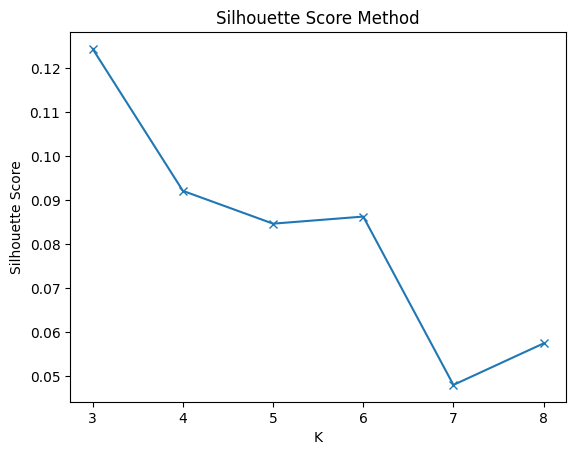

In [53]:
# Plot the silhouette_score to determine the optimal number of clusters
plt.plot(range(3, 9), sil_scores,marker='x')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

#### Discussion:
#### From the above graph, it seems that 3 gives the highest silhouette score implying that 3 could be the optimal number of clusters.


In [54]:
# Apply K-Means clustering with the number of clusters as 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(X_reduced)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print (f"The centroids are -\n {centroids}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The centroids are -
 [[ 2.48022380e+04 -1.22444323e+04 -1.85753245e+03 -2.91260191e+02
   1.43575877e+03  1.46811722e+03 -5.64431207e+02  1.41266313e+03
   1.07788728e+03 -6.78179018e+01 -4.62637526e+02  5.51397427e+02
   9.71986655e+02 -6.86536927e+02  1.13329155e+02 -2.67857457e+02
   3.61271522e+02 -8.83477786e+01 -5.58340572e+02 -2.58675575e+02
   1.61694082e+02  1.69226347e+02 -1.50070768e+02  5.17666535e+01
  -2.44331714e+02  1.99768316e+02 -2.53758301e+02  1.54383087e+02
  -3.12638818e+01 -1.39220336e+02 -3.07199701e+02  3.88472977e+01
  -8.06088328e+01  1.49103087e+02 -1.09820753e+02 -3.27864449e+01
  -1.04530615e+01  2.44276690e+02  1.19140546e+02 -3.32498604e+02
  -1.23428387e+02  9.55773166e+01  4.61996286e+01  8.39152410e+01
   2.67997682e+01  1.56107484e+02 -5.27095730e+01  1.83151758e+02
   1.64494416e+02 -3.58594401e+01  8.61445251e+01 -9.42266470e+01
  -7.79880466e+01  9.22624496e+01 -1.68149219e+02 -1.15470201e+02
  -8.23056693e+01  1.54804846e+02 -4.71854864e+01  1.17

### B. Set the number of clusters to 3 and report clustering accuracy. [4 points]

In [55]:
#Calculating the clustering accuracy using the Silhouette Score

silhouette_avg = silhouette_score(X_reduced, labels)
print("Silhouette Score for 3 clusters:", silhouette_avg)

Silhouette Score for 3 clusters: 0.12196850789975607


A score of approximately 0.12399 indicates that the clusters are somewhat separated but still exhibit overlap. This suggests that the clusters might not be as well-defined as desired, but they are not completely overlapping either.

##6. Cluster the 360 images using EM.

A. You can again reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters using one of the techniques we discussed in class. [4 points]

In [56]:
# Preserving 90% variance
pca_90_em = PCA(n_components=159)
X_reduced_em = pca_90_em.fit_transform(flattened_images)

In [57]:
total_preserved_variance = np.sum(pca_90_em.explained_variance_ratio_)
total_preserved_variance.round(3)

0.9

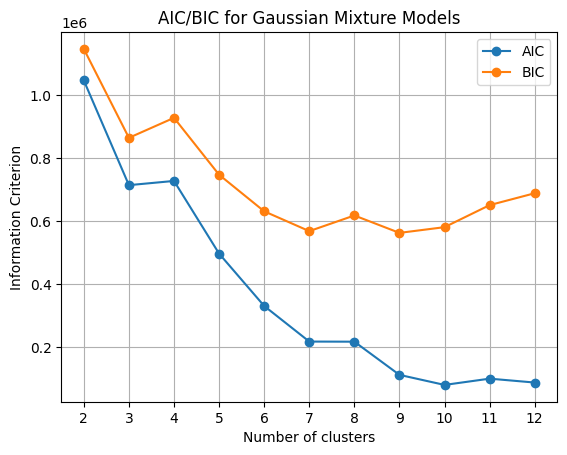

In [58]:
# Finding optimal number of clusters using AIC and BIC
aic_scores = []
bic_scores = []

cluster_range=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for k in cluster_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_reduced_em)

    # Compute AIC
    aic = gmm.aic(X_reduced_em)
    aic_scores.append(aic)
    bic = gmm.bic(X_reduced_em)
    bic_scores.append(bic)

# Plot AIC/BIC scores
plt.plot(range(2, 13), aic_scores, marker='o', label='AIC')
plt.plot(range(2,13), bic_scores, marker='o', label='BIC')
plt.xlabel('Number of clusters')
plt.ylabel('Information Criterion')
plt.title('AIC/BIC for Gaussian Mixture Models')
plt.xticks(np.arange(2, 13))
plt.legend()
plt.grid(True)
plt.show()

Using the AIC and BIC score method from class, the best choice seems to be 6 clusters. We want to minimize the Information Criterion and while the AIC gets lower past 7, the BIC increases so 7 seems to be the best choice for k.

In [59]:
gmm = GaussianMixture(n_components=6)
gmm.fit(X_reduced_em)
gmm.means_

array([[ 1.34877124e+04,  2.48012919e+04, -4.89901122e+03,
        -1.59767563e+02, -1.12730174e+03, -7.32517705e+02,
         2.59256136e+03, -3.59159394e+03,  2.03392963e+02,
        -5.18818540e+00,  5.70900159e+02, -1.62907074e+03,
        -6.95363368e+02,  1.87230254e+03, -3.81144835e+02,
        -3.96429095e+02,  1.24809420e+03,  7.50550247e+02,
        -6.30890691e+02,  7.29705438e+02, -1.06393441e+03,
        -1.17049442e+02,  9.16101164e+02, -2.09103550e+02,
        -2.25203168e+01,  7.16475989e+02, -7.54961687e+02,
         3.96923154e+02, -2.49008758e+02,  3.91071992e+02,
         4.05670573e+02, -4.09384048e+02, -1.51202538e+02,
        -5.18130822e+02, -7.68140270e+02,  4.39697706e+01,
        -5.98546601e+00, -3.53852585e+02, -3.67828929e+02,
         4.04516826e+01,  1.79405680e+02, -5.86235500e+02,
         4.20465403e+02, -3.04513376e+02, -1.26413701e+02,
         2.33325871e+02,  2.40320653e+02,  9.43611002e+01,
         3.50829126e+02,  8.81204461e+01,  3.49839355e+0

#### B. Set the number of clusters to 3 and report clustering accuracy. [4 points]

In [60]:
# Using 3 clusters
gm = GaussianMixture(n_components=3, random_state=42).fit(X_reduced_em)
gm.means_

array([[ 6.00033498e+03,  1.59978991e+04,  4.41049524e+02,
        -1.42381245e+02, -1.36120190e+02, -2.62628282e+02,
         7.11678389e+02, -9.84069882e+02, -7.18953368e+02,
         9.12241174e+01,  1.04470568e+03, -4.65430383e+01,
        -9.14235195e+02,  7.61419363e+02,  1.60263690e+02,
        -1.83914720e+02,  6.72764815e+01,  9.88464534e+01,
         2.54235793e+02,  5.07685425e+01, -1.19979433e+02,
        -2.10503519e+02,  2.20364109e+01, -2.28282686e+02,
        -1.66459546e+02,  1.26546741e+01,  1.91349549e+02,
        -1.26221713e+02,  2.75214892e+01,  1.67826658e+02,
         2.16808412e+02,  1.51600604e+02, -7.54716017e+01,
        -3.29050350e+02, -1.61481902e+02, -3.55622733e+02,
        -1.08305705e+02,  6.90025499e+01, -2.11973758e+02,
        -4.97306012e+01,  8.67064736e+01, -1.47557334e+02,
        -9.89495374e+00, -7.37738994e+01,  3.11865106e+01,
        -1.73645682e+02,  3.56861101e+01,  4.34841415e+01,
         1.02311478e+01,  3.38027451e+02,  3.71293870e+0

In [61]:
labels = gm.predict(X_reduced_em)

In [62]:
len(cat_nums)

360

In [63]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(cat_nums, labels)

print(f"Accuracy: {accuracy}")

Accuracy: 0.30833333333333335


#### C. Use the model to generate 20 new rocks (using the sample() method), and visualize them in the original image space (since you used PCA, you will need to use its inverse_transform() method).

In [64]:
X_new, y_new = gm.sample(20)
X_new

array([[ 1.30084774e+04,  2.61875137e+04, -1.84801550e+04, ...,
        -1.83226563e+03,  1.21746455e+03,  3.77835178e+02],
       [ 1.42598012e+04,  2.78885024e+04, -7.69321578e+03, ...,
         1.69745241e+00,  4.00819086e+03, -2.69672893e+03],
       [ 1.70152060e+04,  2.34671574e+04,  6.66490677e+03, ...,
         1.65028716e+03,  2.72199369e+03, -1.13140247e+03],
       ...,
       [ 1.02604696e+04, -2.28238560e+04,  7.83064509e+02, ...,
         8.59537973e+02, -8.44189871e+02, -1.32735690e+03],
       [ 1.93703435e+04, -2.78510896e+03, -1.33366080e+04, ...,
        -4.97613803e+02,  3.21196157e+02,  1.14132844e+02],
       [ 3.64644672e+03,  3.90930129e+03,  6.80149731e+03, ...,
         1.41593008e+03,  1.00152497e+02, -4.76149981e+02]])

In [65]:
X_restored = pca_90_em.inverse_transform(X_new)

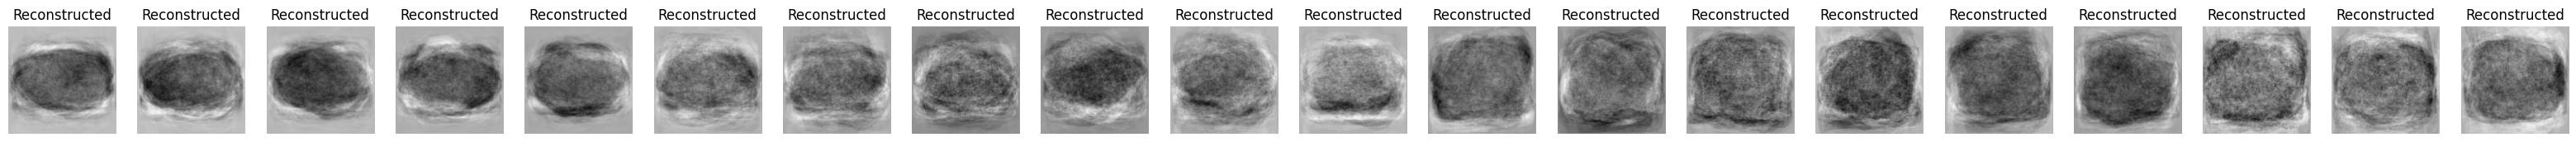

In [66]:
# Reconstruct the images from the PCA components
images_reconstructed = []

for i in range(20):
  images_reconstructed.append(X_restored[i].reshape([height, width]))

# Display 20 new reconstructed images
num_displayed = 20
fig, axes = plt.subplots(1, num_displayed, figsize=(2 * num_displayed, 4))

for i in range(20):
    axes[i].imshow(images_reconstructed[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Reconstructed')

plt.show()

## 7. Build a feedforward neural network (using dense and/or CNN layers) with a few hidden layers (we suggest using Keras (within Tensorflow) or Pytorch). Train the network to classify on 360 rock images using rock name as the label - the category is indicated by the first letter in the filename (I, M and S). Use images from '120 Rocks' folder as your validation data. Choose the number of neurons you find appropriate and efficient (so you have enough time to run it), but make the last layer before the softmax should consist of 8 neurons. The hidden layers should have ReLU activation function. Train the network for multiple epochs until it converges (if the process is too slow, tweak the learning rate and consider simplifying your network). We will not deduct points based on the simplicity of your network, but we expect you to have performance that is above chance performance that could be obtained with an untrained network - in other words, we expect to see train and validation loss decrease and accuracy increase throughout the training.

In [83]:
# Loading in validation data
rocks_val = []
rocks_val_label = []

target_size = (800, 800)

filenames = sorted(os.listdir("120 Rocks"))

for filename in os.listdir("120 Rocks"):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        path = os.path.join('120 Rocks', filename)
        img = Image.open(path)
        img_resized = img.resize(target_size)
        gray_im = img_resized.convert("L")
        rocks_val.append(gray_im)
        rocks_val_label.append(filename[0])

In [84]:
# for photo in

In [85]:
rocks_lab_cat = []
for i in rocks_val_label:
  if i == 'I':
    rocks_lab_cat.append(0)
  elif i == 'M':
    rocks_lab_cat.append(1)
  elif i == 'S':
    rocks_lab_cat.append(2)

In [86]:
rocks_val = np.array(rocks_val)

In [87]:
# Turn labels into np.array so it is same format as X data
cat_nums = np.array(cat_nums)
rocks_lab_cat= np.array(rocks_lab_cat)

In [88]:
rocks_lab_cat.size

120

In [109]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(800, 800)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')

])

In [110]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 640000)            0         
                                                                 
 dense (Dense)               (None, 20)                12800020  
                                                                 
 dense_1 (Dense)             (None, 8)                 168       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 12800215 (48.83 MB)
Trainable params: 12800215 (48.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [112]:
import time

start = time.time()
history = model.fit(rock_arr, cat_nums, epochs=23, batch_size=20, validation_data=(rocks_val, rocks_lab_cat))
end = time.time()
print(f"Training time: {end-start}")

Epoch 1/23
18/18 [==============================] - 7s 357ms/step - loss: 16836.8223 - accuracy: 0.3361 - val_loss: 13458.4414 - val_accuracy: 0.3333
Epoch 2/23
18/18 [==============================] - 5s 296ms/step - loss: 7353.4541 - accuracy: 0.3389 - val_loss: 5396.6865 - val_accuracy: 0.3083
Epoch 3/23
18/18 [==============================] - 5s 275ms/step - loss: 7067.7417 - accuracy: 0.3722 - val_loss: 10169.8535 - val_accuracy: 0.3333
Epoch 4/23
18/18 [==============================] - 6s 365ms/step - loss: 7267.7998 - accuracy: 0.3917 - val_loss: 14068.4863 - val_accuracy: 0.3333
Epoch 5/23
18/18 [==============================] - 5s 281ms/step - loss: 10185.7051 - accuracy: 0.3556 - val_loss: 7057.2686 - val_accuracy: 0.3417
Epoch 6/23
18/18 [==============================] - 6s 335ms/step - loss: 4203.0488 - accuracy: 0.4333 - val_loss: 3973.1306 - val_accuracy: 0.3500
Epoch 7/23
18/18 [==============================] - 5s 298ms/step - loss: 1824.1760 - accuracy: 0.5306 - va

The training time is reported above with the total amount of time at each epoch.

### B. Plot training and validation loss and accuracy as a function of training epochs.


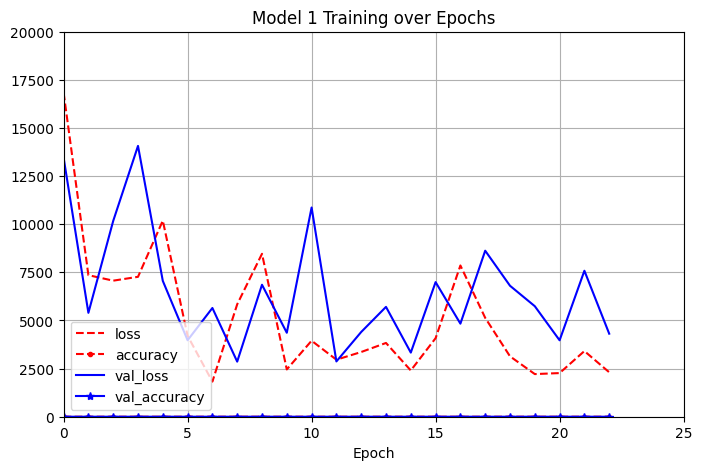

In [113]:
# Code inspiration from https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 25], ylim=[0, 20000], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.title("Model 1 Training over Epochs")
plt.show()

### C. How many parameters does the network have? How many of those are bias parameters?

In [114]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 640000)            0         
                                                                 
 dense (Dense)               (None, 20)                12800020  
                                                                 
 dense_1 (Dense)             (None, 8)                 168       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 12800215 (48.83 MB)
Trainable params: 12800215 (48.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Total params: 12800215
Bias: 12800000

## D. Compare the activity of neurons in the next to the last layer (the one with 8 neurons) with the human data. (to get human data use mds_360.txt and mds_120.txt files). Similar to before, use Procrustes analysis to do the comparison.  For training and validation data (separately), report disparity and compute the correlation coefficient between each dimension of mtx1 and mtx2. Display results in a table. [3 points]

In [115]:
from scipy.spatial import procrustes
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

mds_360 = np.loadtxt('mds_360.txt')
mds_120 = np.loadtxt('mds_120.txt')
def extract_activations(data):
    activations = model.layers[-2].output
    intermediate_model = tf.keras.models.Model(inputs=model.input, outputs=activations)
    return intermediate_model.predict(data)

# Extract activations for training and validation data
train_activations = extract_activations(rock_arr)
valid_activations = extract_activations(rocks_val)

# Flatten the activations for Procrustes analysis
train_activations_flat = train_activations.reshape(train_activations.shape[0], -1)
valid_activations_flat = valid_activations.reshape(valid_activations.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
train_activations_scaled = scaler.fit_transform(train_activations_flat)
valid_activations_scaled = scaler.transform(valid_activations_flat)

4/4 [==============================] - 1s 113ms/step


In [116]:
print(mds_360.shape)
print(train_activations_scaled.shape)

(360, 8)
(360, 8)


In [117]:
mtx1, mtx2, disparity = procrustes(mds_360, train_activations_scaled)

In [118]:
# Calculate disparity between training data and human data
print(f"Disparity between training data and human data is: {disparity}")

# Compute correlation coefficients between each dimension of mtx1 and mtx2
correlations = np.corrcoef(mtx1.T, mtx2.T)
print("Correlation coefficients between training data and human data:")
print(correlations)

Disparity between training data and human data is: 0.8835313142988557
Correlation coefficients between training data and human data:
[[ 1.00000000e+00  4.40810116e-02  6.34770324e-02 -1.55535271e-01
   9.90280535e-04  1.24123729e-01 -1.83558068e-02  1.84032002e-02
   6.66898279e-01  2.22575987e-01  5.81979863e-01 -5.96546851e-01
   3.87562667e-01 -2.75416096e-01 -6.39828837e-01  3.16465821e-01]
 [ 4.40810116e-02  1.00000000e+00  3.63518730e-01 -6.69070361e-03
  -4.98445215e-02  6.79074365e-02  1.84425823e-01  1.71137635e-01
   3.73778300e-02  2.73624186e-01  1.14893840e-01 -1.02105190e-01
   1.38770316e-01 -1.77281294e-01  1.06041748e-01  2.22678955e-01]
 [ 6.34770324e-02  3.63518730e-01  1.00000000e+00  9.25474609e-03
  -9.65393003e-02  3.13441035e-02  1.48794741e-01  1.32954238e-01
   1.97662187e-01  2.32368154e-01  2.32308963e-01 -2.20570302e-01
   2.06648517e-01 -2.06383296e-01 -1.05168660e-01  2.37701054e-01]
 [-1.55535271e-01 -6.69070361e-03  9.25474609e-03  1.00000000e+00
  -1.4